In [1]:
# !pip install SMOTE
# !pip install missingno
# !pip install plotly
# !pip install xgboost
# !pip install sidetable

# Importing Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sidetable as stb
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import plotly.graph_objs as go
import missingno as msn

# Load the Dataset

In [3]:
df = pd.read_csv('Bookings.csv')
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.describe(include = 'all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


### Checking for missing values

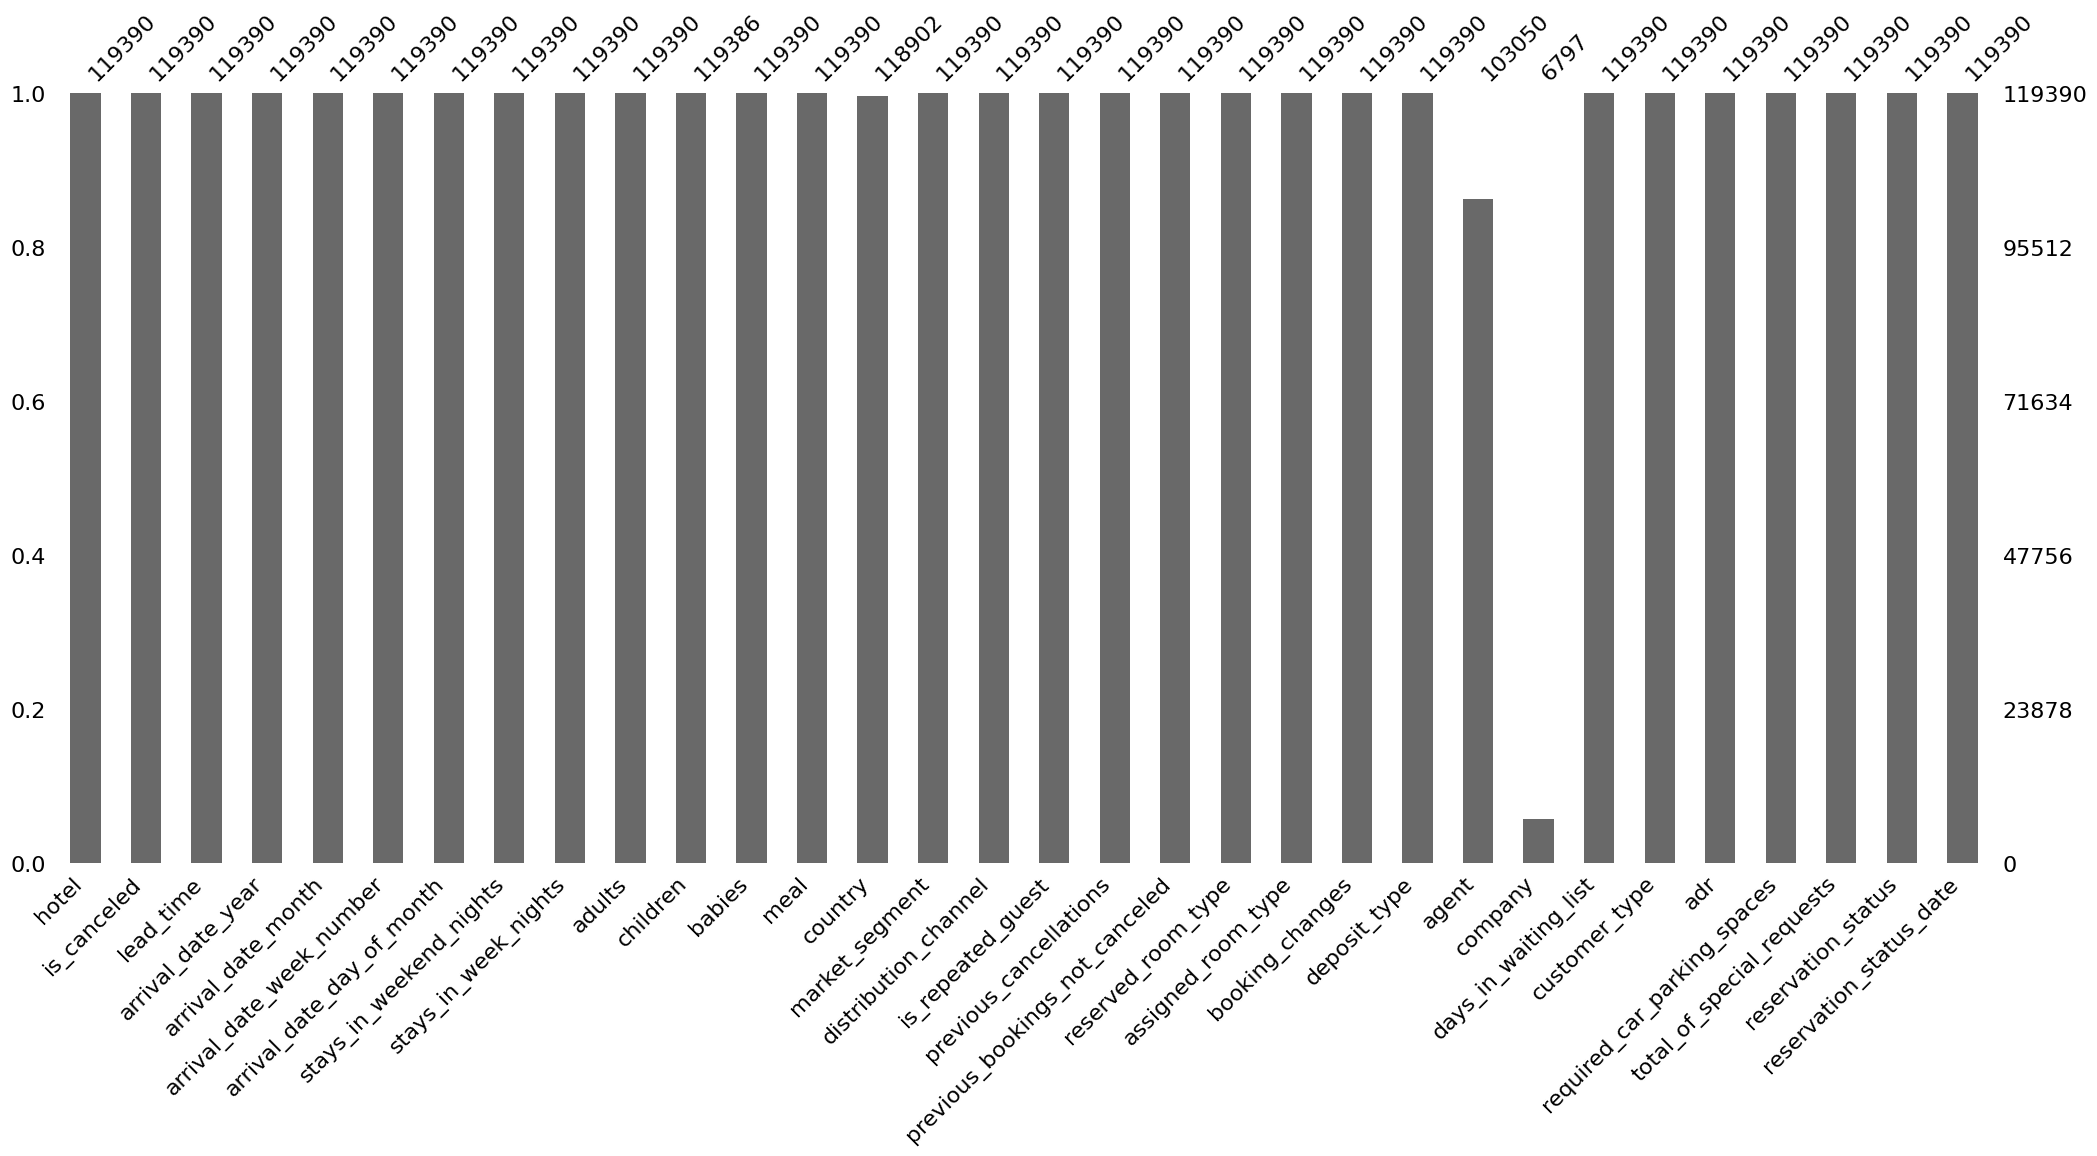

In [6]:
msn.bar(df)
plt.show()

In [7]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
# Removing the following columns as they have a lot of missing values
df.drop(['company','agent'], inplace = True, axis = 1)

In [9]:
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [10]:
df['country'] = df['country'].fillna('PRT')

In [11]:
df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [12]:
df['children'] = df['children'].fillna(0)

In [13]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

### Converting categorical data into numerical data:
1. Hotel:- City Hotel : 0, resort Hotel : 1
2. arrival_date_month:- 
3. meals:- 
4. country:- 
5. market_segemnt:- 
6. distribution_channel:-
7. reserved_room_type:-
8. assigned_room_type:-
9. customer_type:-
10. reservation_status:-
11. reservation_status_date:-

In [14]:
df['hotel'].replace(['City Hotel', 'Resort Hotel'], [0, 1], inplace = True)

In [15]:
df['arrival_date_month'].replace(['August', 'July', 'May', 'October', 'April', 'June', 'September', 'March', 'February', 'November', 'December', 'January'], [7,6,4,9,3,5,8,2,1,10,11,0], inplace = True)

In [16]:
df['meal'] = df['meal'].str.replace('Undefined', 'FB')
df['meal'].replace(['BB', 'HB', 'SC', 'FB'], [0, 1,2,3], inplace = True)

In [17]:
def country(row):
    if (row['country'] == 'IND'):
        return 'Local'
    else :
        return 'International'
    
df['booking_location'] = df.apply(country, axis = 1)
df.drop(['country'], inplace = True, axis = 1)
df['booking_location'].replace(['Local', 'International'], [0,1], inplace = True)

In [18]:
df['market_segment'] = df['market_segment'].str.replace('Undefined', 'Online TA')
df['market_segment'].replace(['Online TA', 'Offline TA/TO', 'Groups', 'Direct', 'Corporate', 'Complementary', 'Aviation'], [0, 1,2,3,4,5,6], inplace = True)

In [19]:
df['distribution_channel'] = df['distribution_channel'].str.replace('Undefined', 'TA/TO')
df['distribution_channel'].replace(['TA/TO', 'Direct', 'Corporate', 'GDS'], [0, 1,2,3], inplace = True)

In [20]:
df['reserved_room_type'] = df['reserved_room_type'].str.replace('L', 'C')
df['reserved_room_type'] = df['reserved_room_type'].str.replace('P', 'C')
df['reserved_room_type'] = df['reserved_room_type'].str.replace('H', 'C')
df['reserved_room_type'].replace(['A', 'B', 'C', 'D', 'E', 'F', 'G'], [0, 1,2,3,4,5,6], inplace = True)

In [21]:
df['assigned_room_type'] = df['assigned_room_type'].str.replace('L', 'H')
df['assigned_room_type'] = df['assigned_room_type'].str.replace('P', 'H')
df['assigned_room_type'] = df['assigned_room_type'].str.replace('K', 'H')
df['assigned_room_type'] = df['assigned_room_type'].str.replace('I', 'H')
df['assigned_room_type'].replace(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], [0, 1,2,3,4,5,6,7], inplace = True)

In [22]:
df['customer_type'].value_counts()
df['customer_type'].replace(['Transient', 'Transient-Party', 'Contract', 'Group'], [0,1,2,3], inplace = True)

In [23]:
df['deposit_type'].value_counts()
df['deposit_type'].replace(['No Deposit', 'Non Refund', 'Refundable'], [0,1,2], inplace = True)

In [24]:
df['reservation_status'].value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [25]:
df['reservation_status'].replace(['Check-Out', 'Canceled', 'No-Show'], [0,1,2], inplace = True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int64  
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int64  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Feature Engineering

combining columns 'adults', 'children' and 'babies' into 'guests'.
combining columns 'children' and 'babies' into 'kids'.

In [27]:
df['guest'] = df['adults'] + df['children'] + df['babies']
df['kids'] = df['children'] + df['babies']
df.drop(['children','babies'], inplace = True, axis = 1)

combining columns 'weekend stays' and 'week day stays'  into 'total stays'.

In [28]:
df['total_stays'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df.drop(['stays_in_weekend_nights','stays_in_week_nights'], inplace = True, axis = 1)

Changing the values of 'previous cancellations' to either 0(not cancelled) or 1(cancelled)

In [29]:
df.stb.freq(['previous_cancellations'], cum_cols = False)

,previous_cancellations,count,percent
0,0,112906,94.569059
1,1,6051,5.068264
2,2,116,0.097161
3,3,65,0.054443
4,24,48,0.040204
5,11,35,0.029316
6,4,31,0.025965
7,26,26,0.021777
8,25,25,0.020940
9,6,22,0.018427


In [30]:
def cancellation(row):
    if (row['previous_cancellations'] == 0):
        return 0
    else :
        return 1

df['is_previously_cancelled'] = df.apply(cancellation, axis = 1)
df.stb.freq(['is_previously_cancelled'], cum_cols = False)

,is_previously_cancelled,count,percent
0,0,112906,94.569059
1,1,6484,5.430941


changing values of column 'booking changes' to either 0(booking not changed) or 1(booking changed)

In [31]:
df.stb.freq(['booking_changes'], cum_cols = False)

,booking_changes,count,percent
0,0,101314,84.859703
1,1,12701,10.638244
2,2,3805,3.187034
3,3,927,0.776447
4,4,376,0.314934
5,5,118,0.098836
6,6,63,0.052768
7,7,31,0.025965
8,8,17,0.014239
9,9,8,0.006701


In [32]:
def changes(row):
    if (row['booking_changes'] == 0):
        return 0
    else :
        return 1

df['is_booking_changes'] = df.apply(changes, axis = 1)
df.stb.freq(['is_booking_changes'], cum_cols = False)

df.drop(['booking_changes'], inplace = True, axis = 1)

In [33]:
df['required_car_parking_spaces'].value_counts()

0    111974
1      7383
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

In [34]:
def changes(row):
    if (row['required_car_parking_spaces'] == 0):
        return 0
    else :
        return 1

df['car_booking_required'] = df.apply(changes, axis = 1)
df.stb.freq(['car_booking_required'], cum_cols = False)

,car_booking_required,count,percent
0,0,111974,93.788424
1,1,7416,6.211576


In [35]:
df.drop(['required_car_parking_spaces'], inplace = True, axis = 1)

### Checking for Correlations

C:\Users\maqso\AppData\Local\Temp\ipykernel_16480\2285195563.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='spearman'), annot=True, cmap='coolwarm')


<AxesSubplot: >

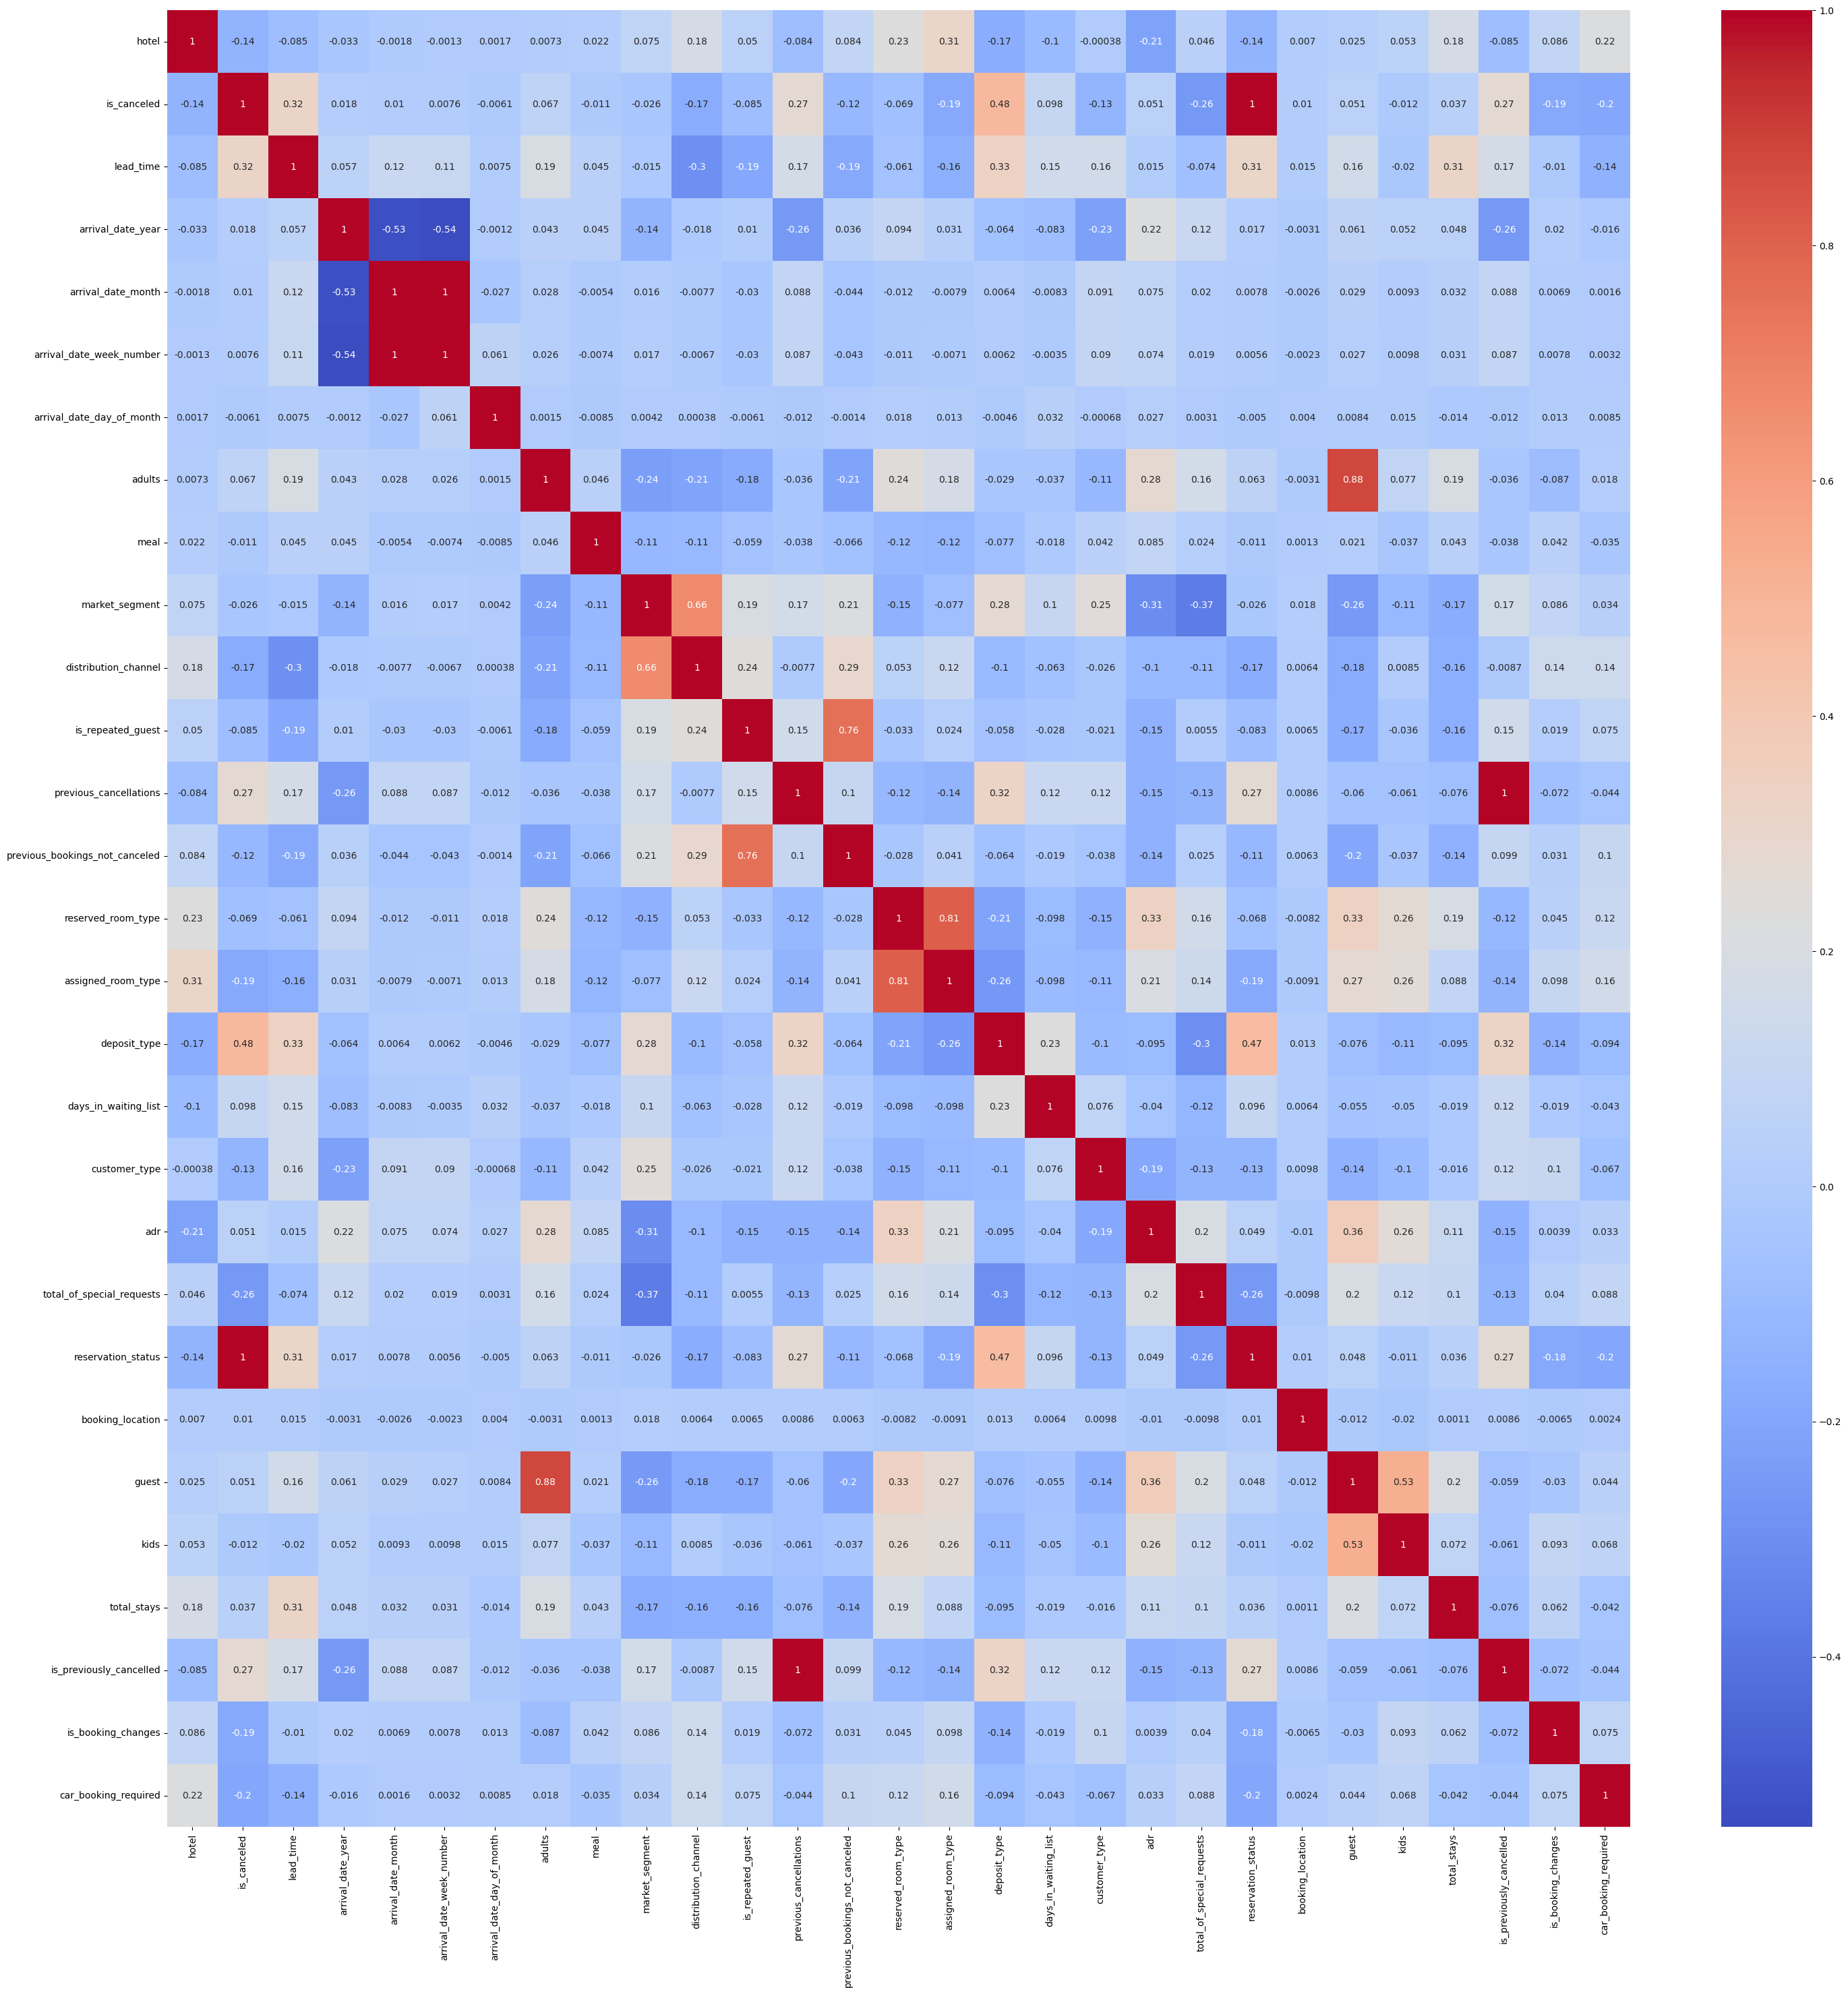

In [36]:
plt.figure(figsize=(35, 35))
sns.heatmap(df.corr(method='spearman'), annot=True, cmap='coolwarm')

In [37]:
df.drop(['adr', 'guest', 'previous_cancellations', 'arrival_date_week_number', 'reservation_status_date', 'reservation_status','assigned_room_type'], inplace = True, axis = 1)

In [38]:
df.var()

hotel                                 0.222954
is_canceled                           0.233210
lead_time                         11419.721511
arrival_date_year                     0.500522
arrival_date_month                    9.551924
arrival_date_day_of_month            77.102966
adults                                0.335543
meal                                  0.504455
market_segment                        1.604541
distribution_channel                  0.303624
is_repeated_guest                     0.030894
previous_bookings_not_canceled        2.242317
reserved_room_type                    2.694599
deposit_type                          0.112010
days_in_waiting_list                309.574203
customer_type                         0.304521
total_of_special_requests             0.628529
booking_location                      0.001272
kids                                  0.170206
total_stays                           6.540493
is_previously_cancelled               0.051360
is_booking_ch

In [39]:
df['lead_time'] = np.log(df['lead_time']+1)
df['arrival_date_day_of_month'] = np.log(df['arrival_date_day_of_month']+1)
df['arrival_date_month'] = np.log(df['arrival_date_month']+1)
df['days_in_waiting_list'] = np.log(df['days_in_waiting_list']+1)
df['reserved_room_type'] = np.log(df['reserved_room_type']+1)
df['total_stays'] = np.log(df['total_stays']+1)

In [40]:
df.var()

hotel                             0.222954
is_canceled                       0.233210
lead_time                         2.591420
arrival_date_year                 0.500522
arrival_date_month                0.393439
arrival_date_day_of_month         0.506267
adults                            0.335543
meal                              0.504455
market_segment                    1.604541
distribution_channel              0.303624
is_repeated_guest                 0.030894
previous_bookings_not_canceled    2.242317
reserved_room_type                0.447735
deposit_type                      0.112010
days_in_waiting_list              0.503967
customer_type                     0.304521
total_of_special_requests         0.628529
booking_location                  0.001272
kids                              0.170206
total_stays                       0.232570
is_previously_cancelled           0.051360
is_booking_changes                0.128481
car_booking_required              0.058258
dtype: floa

In [41]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_day_of_month', 'adults', 'meal',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_bookings_not_canceled', 'reserved_room_type', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'total_of_special_requests',
       'booking_location', 'kids', 'total_stays', 'is_previously_cancelled',
       'is_booking_changes', 'car_booking_required'],
      dtype='object')

# Model Building

In [ ]:
x = df['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_day_of_month', 'adults', 'meal',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_bookings_not_canceled', 'reserved_room_type', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'total_of_special_requests',
       'booking_location', 'kids', 'total_stays', 'is_previously_cancelled',
       'is_booking_changes', 'car_booking_required']

In [43]:
y = df['is_canceled']

In [44]:
sm = SMOTE(sampling_strategy = 'not majority', random_state = 42)
x_resample, y_resample = sm.fit_resample(x,y)
x_df = pd.DataFrame(x_resample)
y_df = pd.DataFrame(y_resample)

In [45]:
x_resample.shape,y_df.shape

((150332, 22), (150332, 1))

<AxesSubplot: xlabel='is_canceled', ylabel='count'>

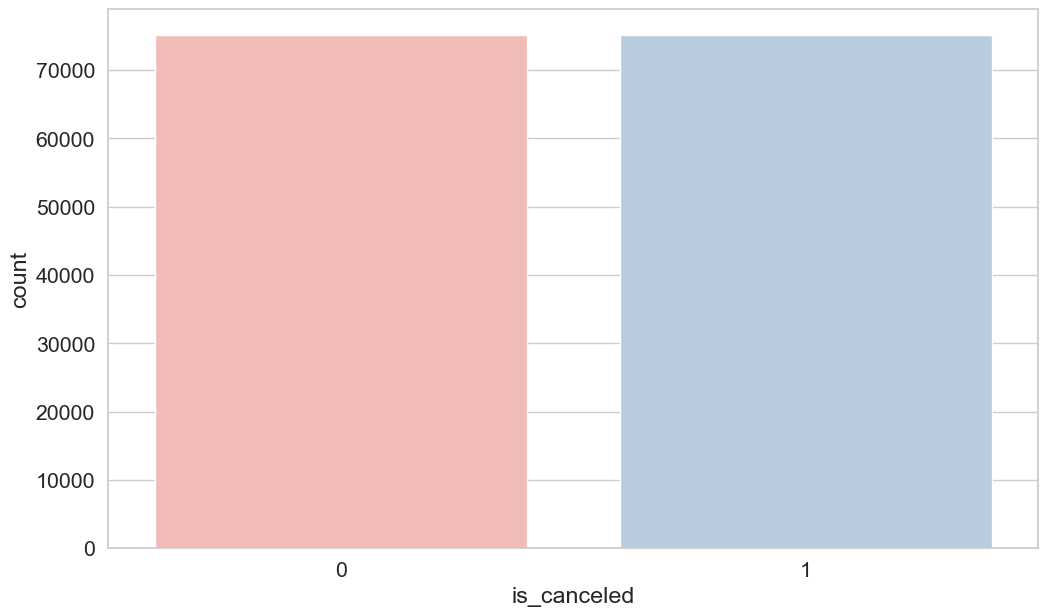

In [46]:
sns.set(style = 'whitegrid', font_scale = 1.4)
plt.subplots(figsize = (12,7))
sns.countplot(x = 'is_canceled', data = y_df, palette = 'Pastel1')

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(x_resample, y_resample, test_size=0.3,random_state=30)

In [48]:
from xgboost import XGBClassifier

clf = XGBClassifier(random_state=0)

params= {'gamma': [1, 2, 4,6],

        'n_estimators' : [250,300,350]} # number of trees you want to build 

In [49]:
grid_search = GridSearchCV(estimator = clf,param_grid = params,cv = 10,scoring = 'f1',return_train_score=True)
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             param_grid={'gamma': [1, 2, 4, 6],
                         'n_estimators': [250, 300, 350]},
             return_train_score=True, scoring='f1')

In [50]:
grid_search.best_params_

{'gamma': 1, 'n_estimators': 300}

In [51]:
xgb_model = XGBClassifier(gamma= 1,
        n_estimators =300)

xgb_model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=1, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [52]:
pred_xgb_train = xgb_model.predict(X_train)
pd.Series(pred_xgb_train).value_counts()

0    56800
1    48432
dtype: int64

In [53]:
pd.crosstab(Y_train,pred_xgb_train)

col_0,0,1
is_canceled,,
0,48348,4140
1,8452,44292


In [54]:
pred_xgb_test = xgb_model.predict(X_test)
pd.Series(pred_xgb_test).value_counts()

0    24483
1    20617
dtype: int64

In [55]:
pd.crosstab(Y_test,pred_xgb_test)

col_0,0,1
is_canceled,,
0,20512,2166
1,3971,18451


In [56]:
accuracy_xgb_test = accuracy_score(Y_test,pred_xgb_test)
print(accuracy_xgb_test)

0.8639246119733924


In [57]:
accuracy_xgb_train = accuracy_score(Y_train,pred_xgb_train)
print(accuracy_xgb_train)

0.8803405808119203


In [58]:
print(classification_report(Y_test,pred_xgb_test))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87     22678
           1       0.89      0.82      0.86     22422

    accuracy                           0.86     45100
   macro avg       0.87      0.86      0.86     45100
weighted avg       0.87      0.86      0.86     45100

